In [1]:
import scanpy as sc
import numpy as np
import spin
import pandas as pd

In [7]:
topregion = '5'
subregions = list(range(5))

tissue_path = None
latent_path = None
dpi = 200

In [13]:
for num_nbrs in [10*i for i in range(2,7)]:

    subdatas = []
    for subregion in subregions:
        subdata = sc.read_h5ad(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/subregion{subregion}/{num_nbrs}nbrs/topregion{topregion}_subregion{subregion}.h5ad')
        subdatas.append(subdata)
    adata = sc.concat(subdatas)

    adata.obs['region'] = [adata.obs['topregion'][i]+'_'+adata.obs['subregion'][i]+'_'+adata.obs['subsubregion'][i] for i in range(len(adata))]
    adata.obs['region'] = adata.obs['region'].astype('category')
    adata.obs[['x','y']] = adata.obs[['row','col']]

    adata.write(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/topregion{topregion}_subclustered_{num_nbrs}nbrs.h5ad')

In [4]:
num_nbrs = 20
adata = sc.read_h5ad(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/topregion{topregion}_subclustered_{num_nbrs}nbrs.h5ad')

# 2nd level

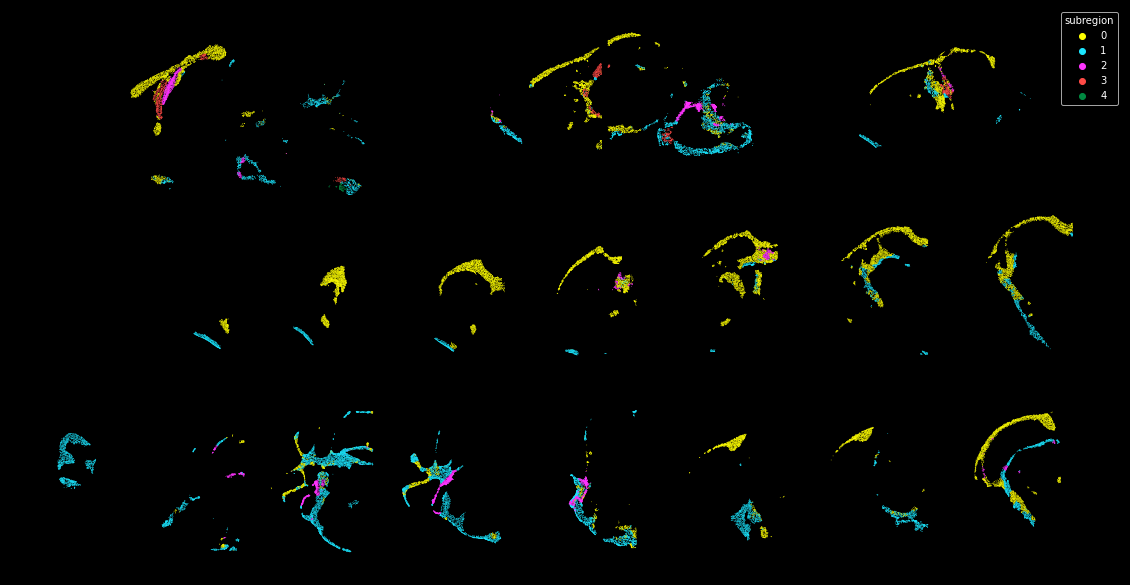

In [24]:
region_key = 'subregion'
regions = adata.obs[region_key].value_counts().index # sorted by number of cells
palette = sc.pl.palettes.default_102
cmap = {regions[i]:palette[i] for i in range(len(regions))}

tissue_path = f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/topregion{topregion}_{num_nbrs}nbrs_2ndlevel.png'
spin.plot_tissue(adata, colors=adata.obs[region_key], cmap=cmap, s=0.5, figscale=20, path=tissue_path, dpi=dpi, legend=True)

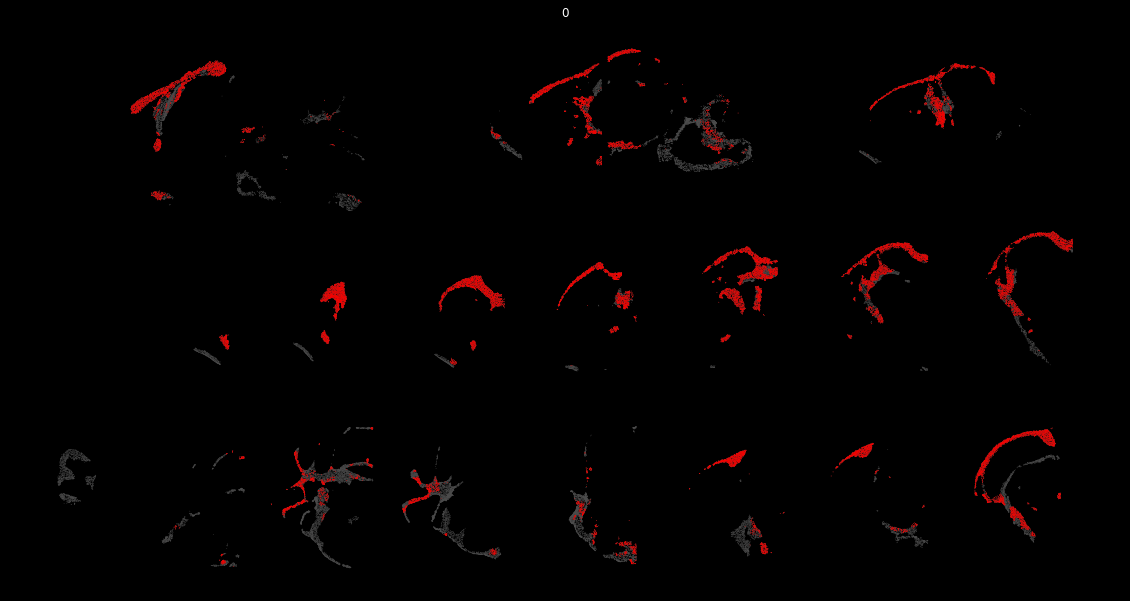

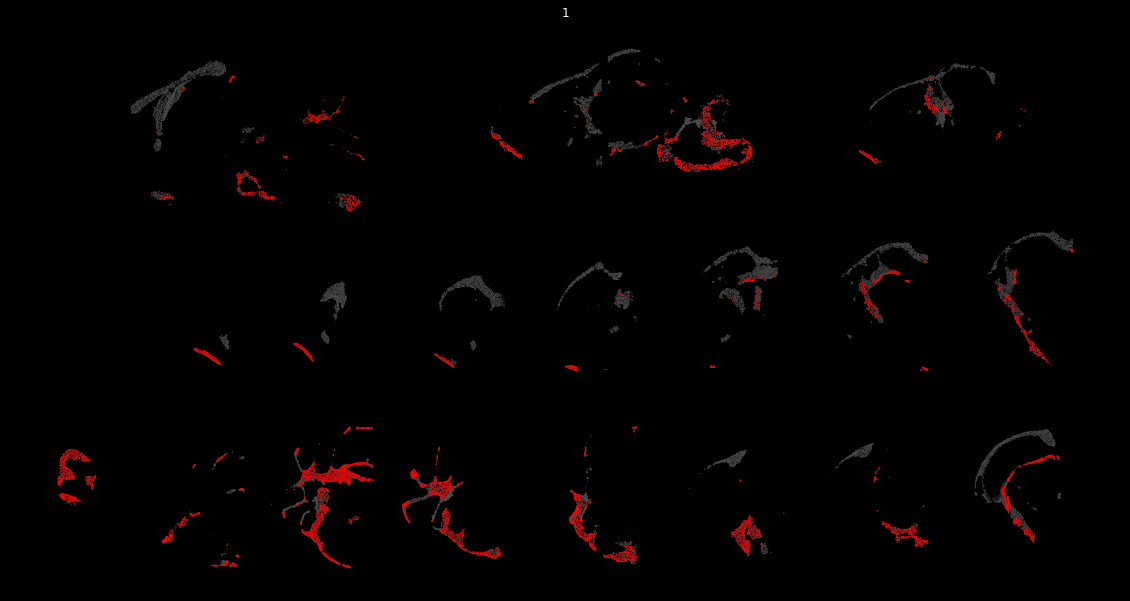

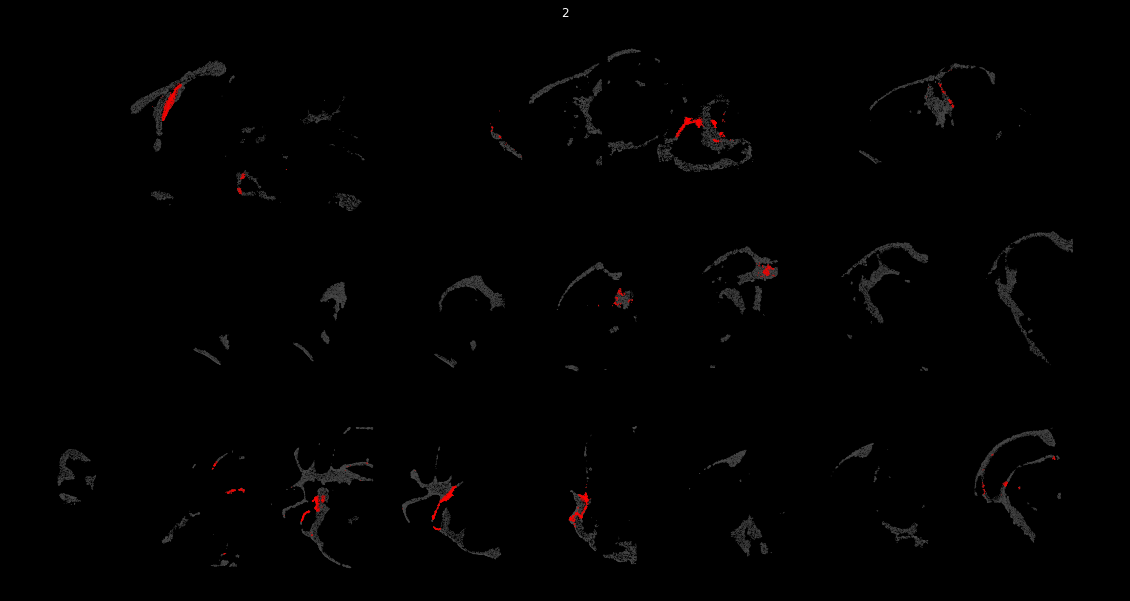

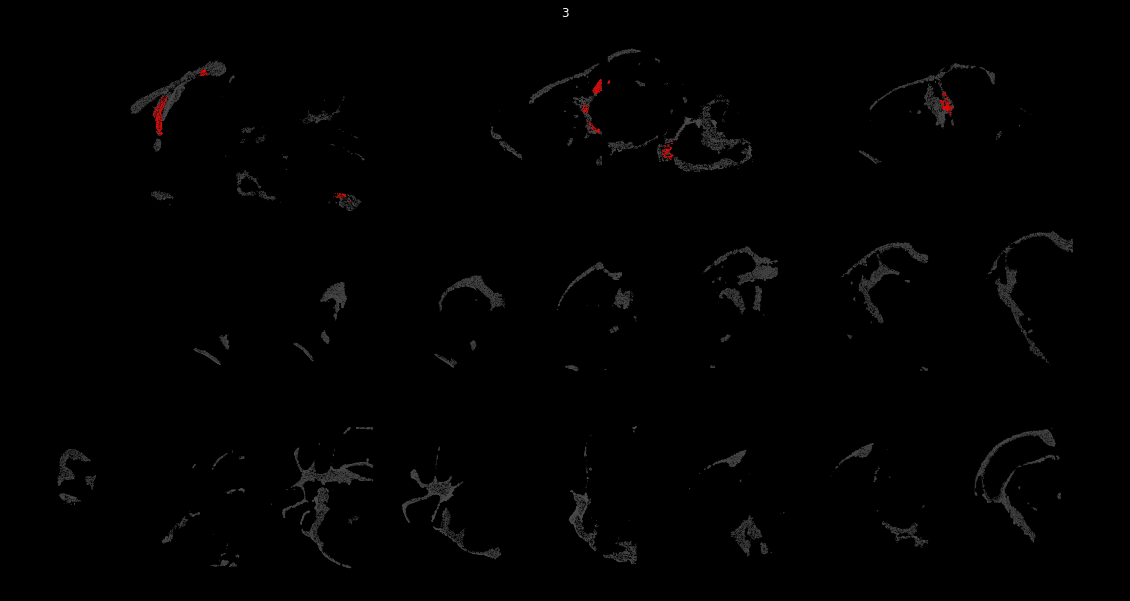

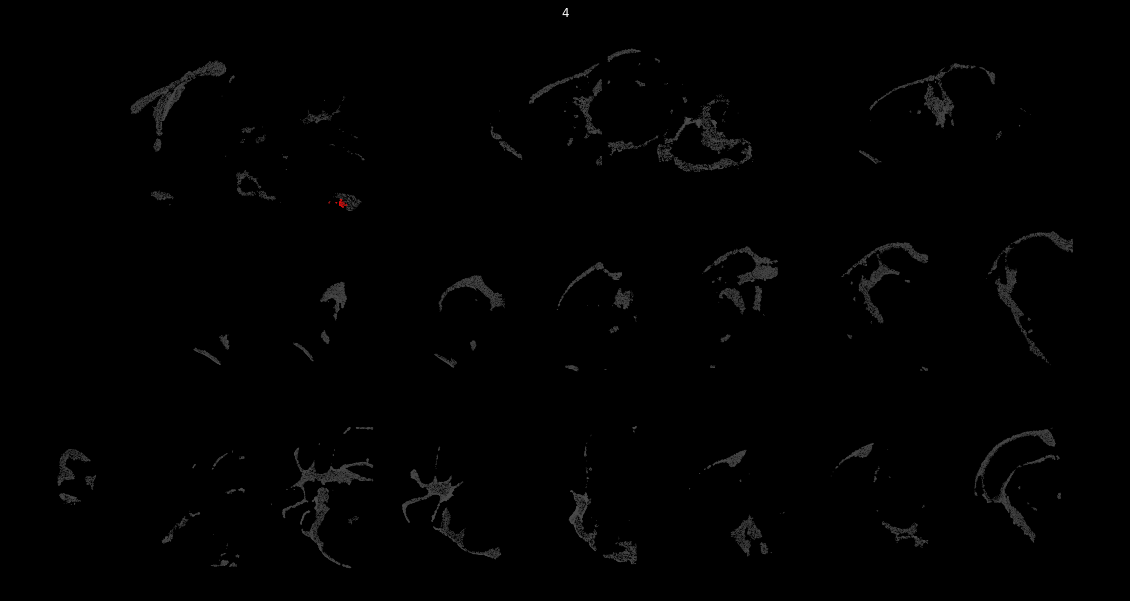

In [26]:
for region in adata.obs[region_key].value_counts().index:
    spin.plot_regions_tissue(adata, [region], region_key, title=region, figscale=20, s=0.5, dpi=200,
                             path=f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/{region}_{num_nbrs}nbrs.png')

In [25]:
sc.tl.rank_genes_groups(adata, groupby=region_key, use_raw=False)

subregions = adata.obs[region_key].value_counts().index # sorted by number of cells
num_markers = 10
markers = np.zeros((len(subregions),num_markers), dtype=object)

for j in range(len(subregions)):
    top_markers = sc.get.rank_genes_groups_df(adata, group=[subregions[j]])['names'][:num_markers].values
    markers[j] = top_markers

marker_df = pd.DataFrame(data=markers, index=subregions, columns=[f'rank{i+1}' for i in range(num_markers)])
marker_df.to_csv(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/topregion{topregion}_markers_2ndlevel.csv')

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldc

# 3rd level

## Cluster specific 2nd level

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldc

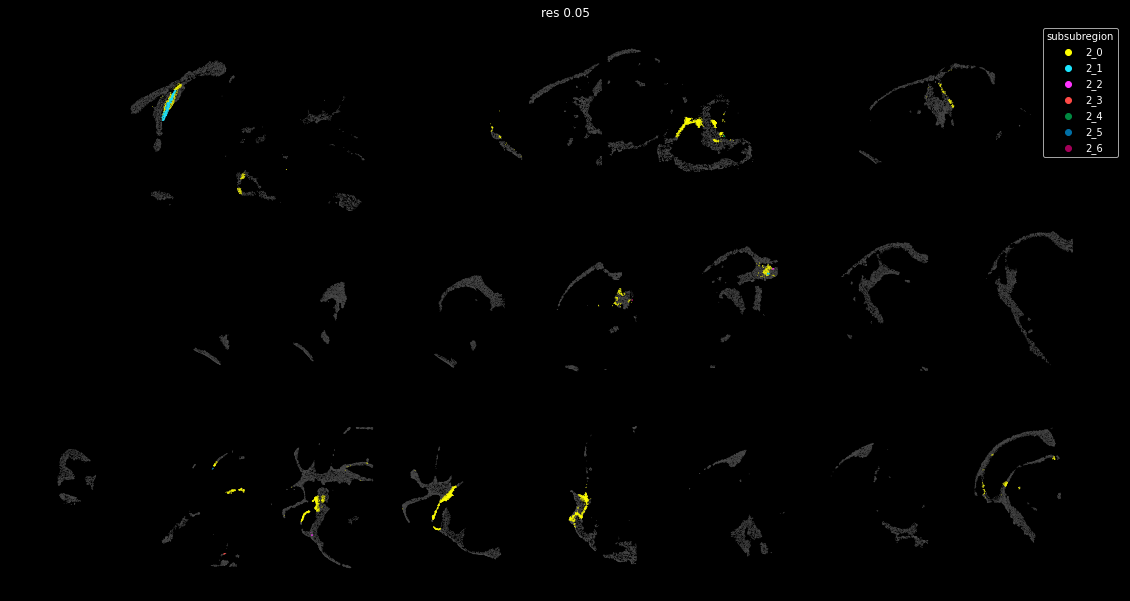

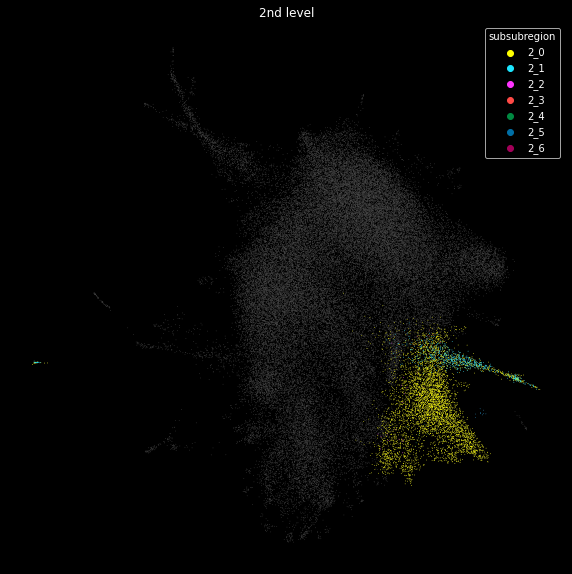

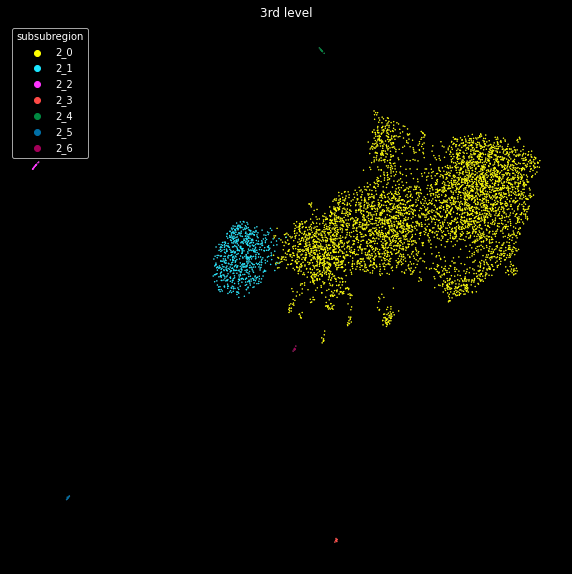

In [16]:
i = 2

res = 0.05

num_nbrs = 20

region_key = 'subsubregion'
subdata = sc.read_h5ad(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/subregion{i}/{num_nbrs}nbrs/topregion{topregion}_subregion{i}.h5ad')
sc.tl.leiden(subdata, resolution=res, neighbors_key=region_key, key_added=region_key)

adata = sc.concat([adata[adata.obs['subregion']!=str(i)], subdata])
adata.obs[region_key] = [adata.obs['subregion'][i]+'_'+adata.obs[region_key][i] for i in range(len(adata))]
adata.obs[region_key] = adata.obs[region_key].astype('category')
adata.obs[['x','y']] = adata.obs[['row','col']]

# Marker genes
sc.tl.rank_genes_groups(subdata, groupby=region_key, use_raw=False)

subregions = subdata.obs[region_key].value_counts().index # sorted by number of cells
num_markers = 10
markers = np.zeros((len(subregions),num_markers), dtype=object)

for j in range(len(subregions)):
    top_markers = sc.get.rank_genes_groups_df(subdata, group=[subregions[j]])['names'][:num_markers].values
    markers[j] = top_markers

marker_df = pd.DataFrame(data=markers, index=subregions, columns=[f'rank{i+1}' for i in range(num_markers)])
marker_df.index.name = f'subregion {i}'
marker_df.to_csv(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/subregion{i}/{num_nbrs}nbrs/topregion{topregion}_subregion{i}_markers_res08.csv')

# Plot
region_key = 'subsubregion'
subregion = str(i)
subsubregions = adata[adata.obs['subregion']==subregion].obs[region_key].value_counts().index # sorted by number of cells
palette = sc.pl.palettes.default_102
cmap = {subsubregions[i]:palette[i] for i in range(len(subsubregions))}

spin.plot_regions_tissue(adata, subsubregions, region_key, cmap=cmap, s=0.5, figscale=20, path=tissue_path, dpi=dpi, legend=True, title=f'res {res}')
spin.plot_regions_latent(adata, 'X_umap_spin_sub', subsubregions, region_key, cmap=cmap, s=0.5, figscale=10, path=tissue_path, dpi=dpi, legend=True, title='2nd level')
spin.plot_regions_latent(adata[adata.obs['subregion']==subregion], 'X_umap_spin_subsub', subsubregions, region_key, cmap=cmap, s=2, figscale=10, path=tissue_path, dpi=dpi, legend=True, title='3rd level')

## Cluster all 2nd level

In [23]:
region_key = 'subsubregion'
num_nbrs = 20

ress = {
    '0': 0.0, # 0
    '1': 0.0, # 1
    '2': 0.05, # 2
    '3': 0.0, # 3
    '4': 0.0, # 4
}

subdatas = []
for i in range(len(ress)):

    print(i, flush=True)
    subdata = sc.read_h5ad(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/subregion{i}/{num_nbrs}nbrs/topregion{topregion}_subregion{i}.h5ad')
    sc.tl.leiden(subdata, resolution=ress[str(i)], neighbors_key=region_key, key_added=region_key)
    subdatas.append(subdata)

    sc.tl.rank_genes_groups(subdata, groupby=region_key, use_raw=False)

    subregions = subdata.obs[region_key].value_counts().index # sorted by number of cells
    num_markers = 10
    markers = np.zeros((len(subregions),num_markers), dtype=object)

    for j in range(len(subregions)):
        top_markers = sc.get.rank_genes_groups_df(subdata, group=[subregions[j]])['names'][:num_markers].values
        markers[j] = top_markers

    marker_df = pd.DataFrame(data=markers, index=subregions, columns=[f'rank{i+1}' for i in range(num_markers)])
    marker_df.index.name = f'subregion {i}'
    marker_df.to_csv(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/topregion{topregion}_subregion{i}_markers.csv')

adata = sc.concat(subdatas)
adata.obs['region'] = [adata.obs['subregion'][i]+'_'+adata.obs[region_key][i] for i in range(len(adata))]
adata.obs['region'] = adata.obs[region_key].astype('category')
adata.obs[['x','y']] = adata.obs[['row','col']]

0
1


/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


2


/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: Mean of empty slice.
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)


3


/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldc

4


/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: Mean of empty slice.
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarn

In [24]:
adata.write(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/topregion{topregion}_subclustered_20220921.h5ad')

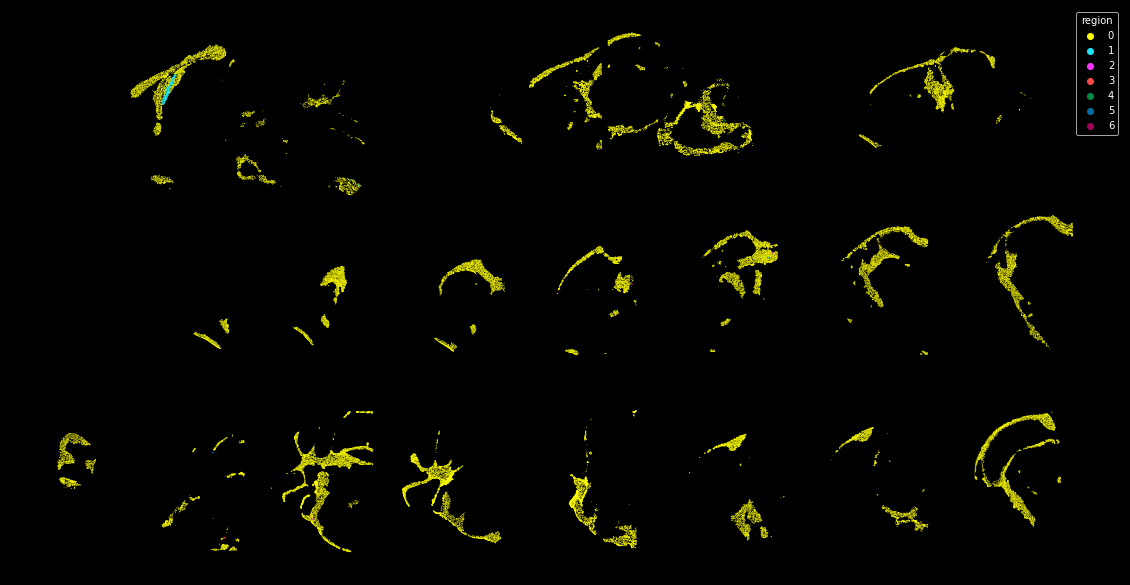

In [25]:
region_key = 'region'
regions = adata.obs[region_key].value_counts().index # sorted by number of cells
palette = sc.pl.palettes.default_102
cmap = {regions[i]:palette[i] for i in range(len(regions))}

tissue_path = f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/topregion{topregion}_{num_nbrs}nbrs_3rdlevel.png'
spin.plot_tissue(adata, colors=adata.obs[region_key], cmap=cmap, s=0.5, figscale=20, path=tissue_path, dpi=dpi, legend=True)

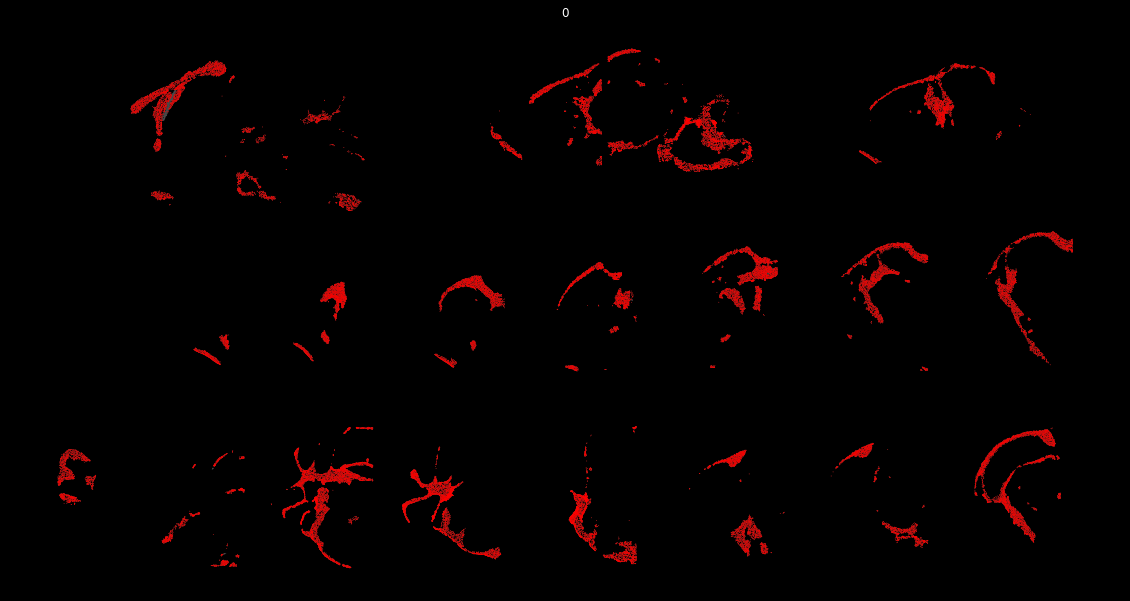

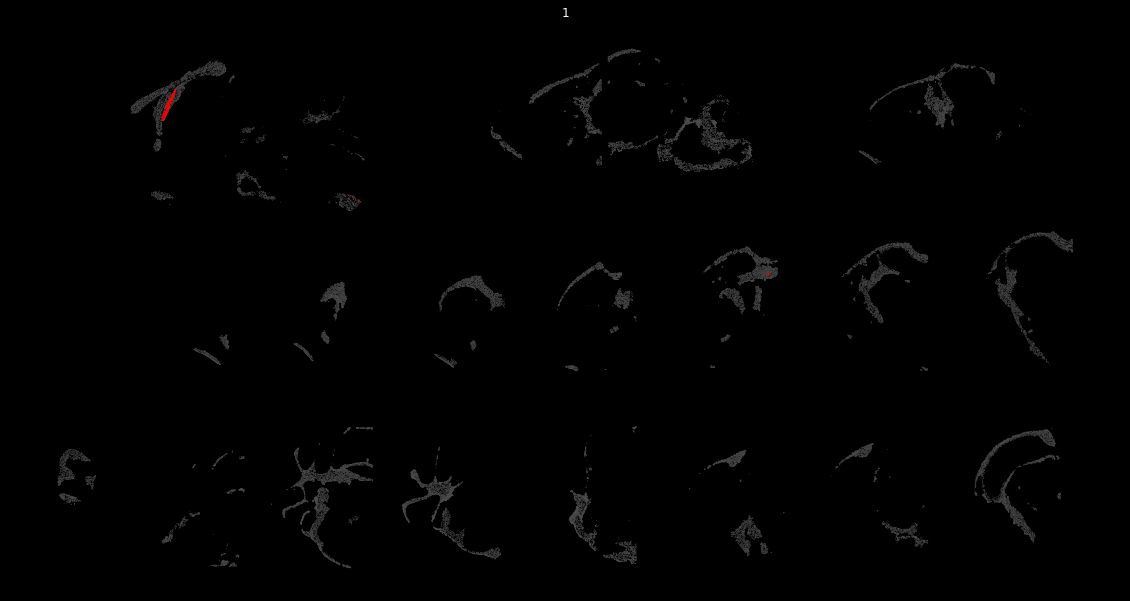

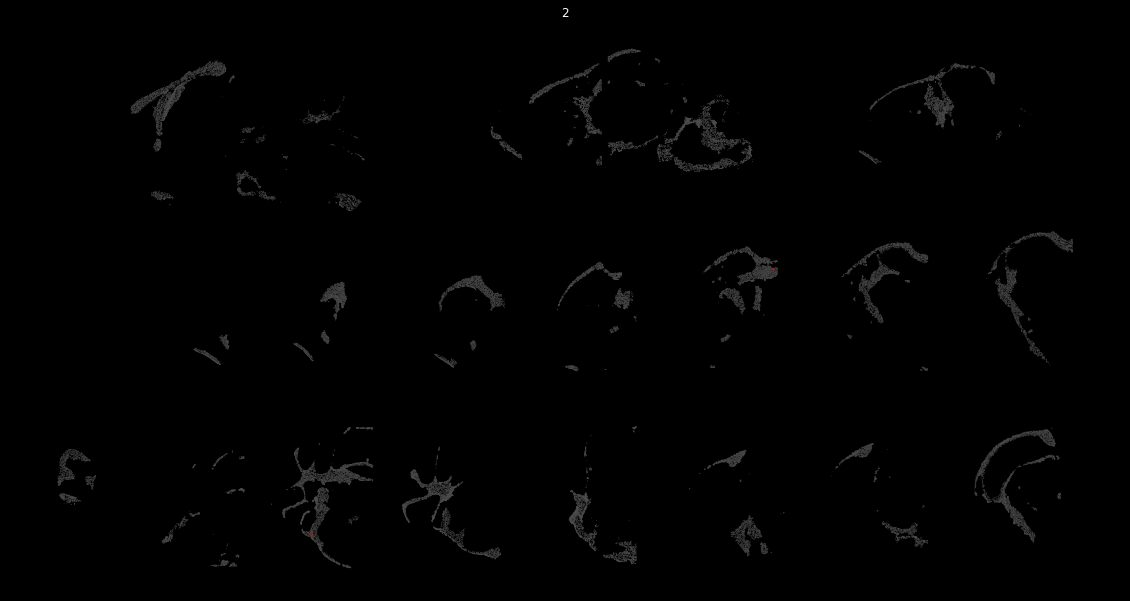

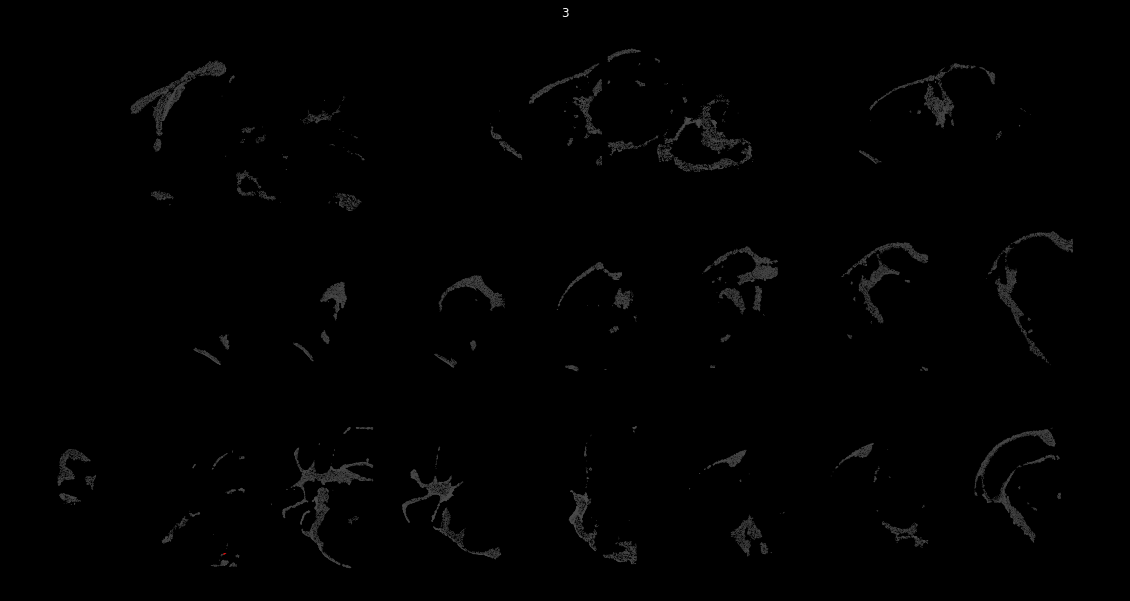

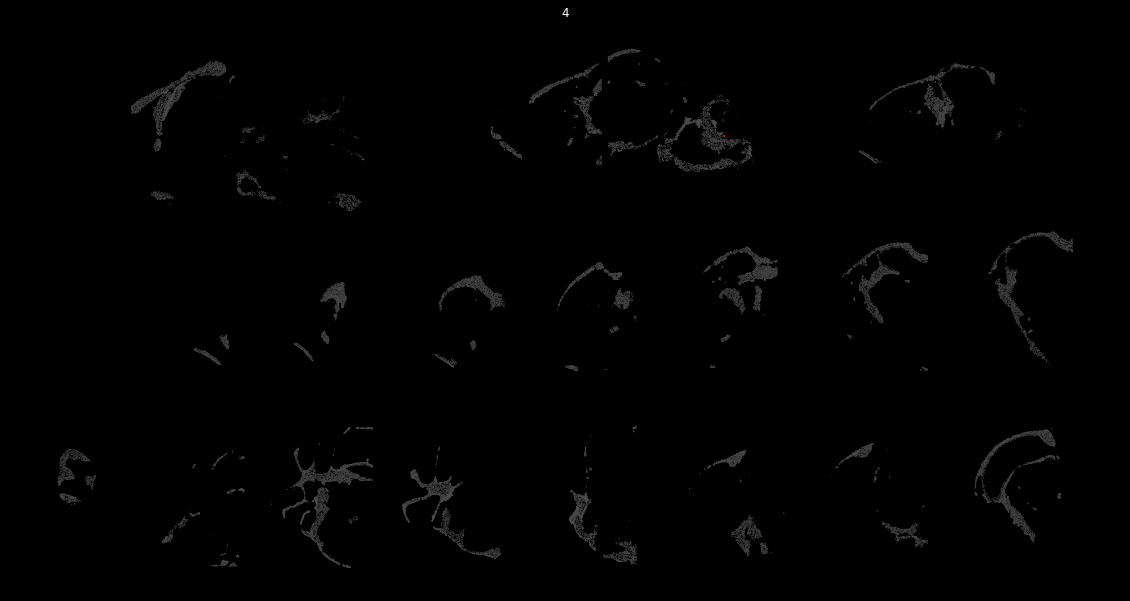

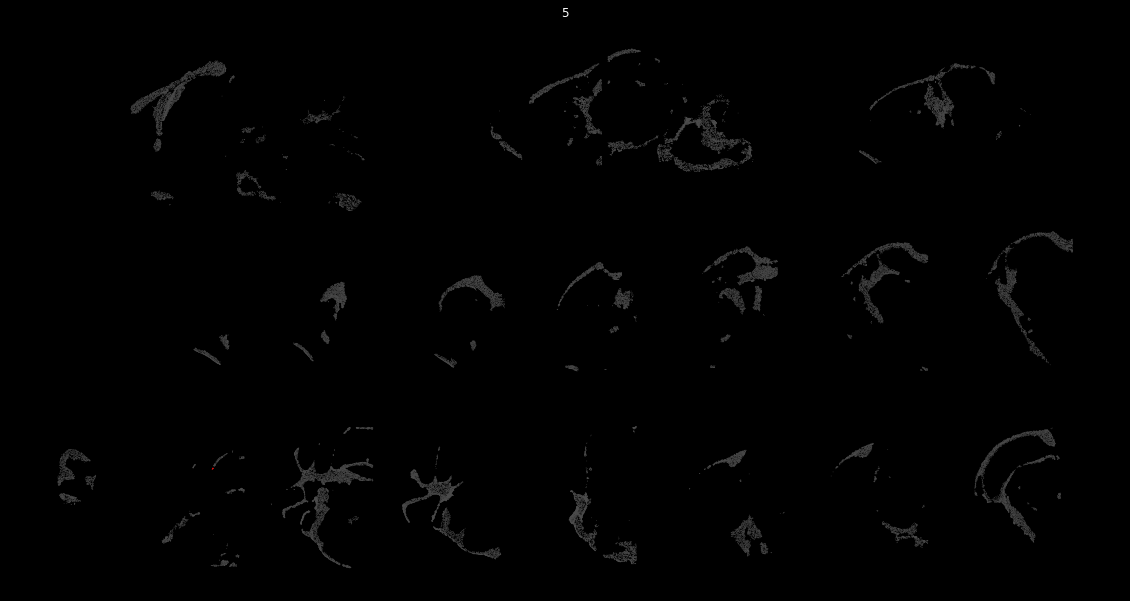

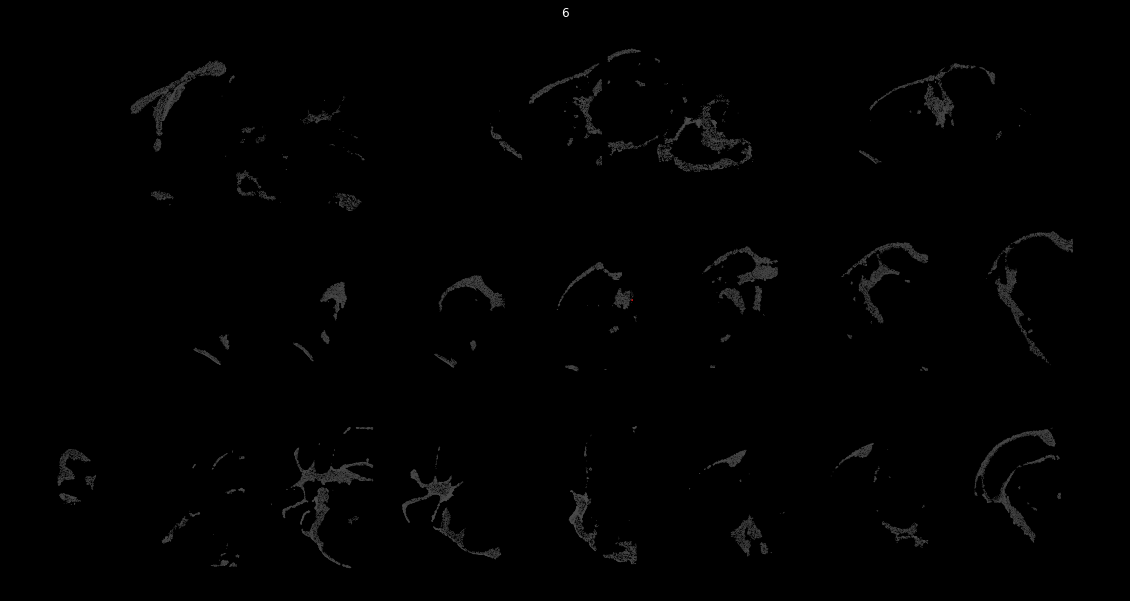

In [26]:
for region in adata.obs[region_key].value_counts().index:
    spin.plot_regions_tissue(adata, [region], region_key, title=region, figscale=20, s=0.5, dpi=200,
                             path=f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/{region}_{num_nbrs}nbrs.png')

In [27]:
# for subregion in adata.obs['subregion'].unique():

#     subdata = adata[adata.obs['subregion']==subregion]

#     sc.tl.rank_genes_groups(subdata, groupby=region_key, use_raw=False)

#     subregions = subdata.obs[region_key].value_counts().index # sorted by number of cells
#     num_markers = 10
#     markers = np.zeros((len(subregions),num_markers), dtype=object)

#     for j in range(len(subregions)):
#         top_markers = sc.get.rank_genes_groups_df(subdata, group=[subregions[j]])['names'][:num_markers].values
#         markers[j] = top_markers

#     marker_df = pd.DataFrame(data=markers, index=subregions, columns=[f'rank{i+1}' for i in range(num_markers)])
#     marker_df.to_csv(f'/stanley/WangLab/kamal/data/integrated/spatial/atlas/topregion{topregion}/subsub_nbr_titration/topregion{topregion}_subregion{subregion}_markers_3rdlevel.csv')

/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: Mean of empty slice.
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/stanley/WangLab/envs/neighbors/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldc